In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file=pd.read_csv("../Database/ready_for_sql/ml_table.csv")
df=file.copy()
df.head()

,channel_id,custom_url,topic_category,channel_view_count,subscriber_count,channel_video_count,video_id,like_count,comment_count,view_count,day_of_week_published,time_published,video_length_seconds
0,UCbCmjCuTUZos6Inko4u57UQ,@cocomelon,Music,142468175305,146000000,811,lmH5uqwaFq8,19653,0,3425275,Tuesday,07:00:15,179.0
1,UCbCmjCuTUZos6Inko4u57UQ,@cocomelon,Music,142468175305,146000000,811,0SY0Yn0yF9o,15076,0,2882582,Saturday,07:00:00,1792.0
2,UCbCmjCuTUZos6Inko4u57UQ,@cocomelon,Music,142468175305,146000000,811,sNyF7BvVfxs,47763,0,8673081,Tuesday,07:00:16,169.0
3,UCbCmjCuTUZos6Inko4u57UQ,@cocomelon,Music,142468175305,146000000,811,K4kqqCzF-BA,57936,0,11744611,Saturday,07:00:12,3681.0
4,UCbCmjCuTUZos6Inko4u57UQ,@cocomelon,Music,142468175305,146000000,811,gfZmvllWVwY,46041,0,8775011,Tuesday,07:00:19,159.0


In [3]:
#make new column that has binary classification. if view count is greather than 1,000,000 then add 1 if less than add 0
def viral(row):
    if row['view_count'] > 1000000:
        return 1
    else:
        return 0

In [4]:
#add the viral column 
df['viral']=df.apply(lambda row: viral(row), axis=1)
df.sample(5)

,channel_id,custom_url,topic_category,channel_view_count,subscriber_count,channel_video_count,video_id,like_count,comment_count,view_count,day_of_week_published,time_published,video_length_seconds,viral
6444,UC5TKWxKKl1IRfTZsVgS0ziA,ninasnutritionandexercisevideos,Physical_fitness,806787,1120,333,DiXF1tubIYM,1,0,11,Saturday,15:00:20,1931.0,0
4706,UCEdvpU2pFRCVqU6yIPyTpMQ,@marshmellomusic,Music,13763100048,56000000,403,3xoCjjQeXfY,31388,433,438712,Tuesday,19:33:19,13.0,0
3057,UCx-dJoP9hFCBloY9qodykvw,@bazbattles,Knowledge,85826404,711000,76,svVQwU86Pp8,15494,688,637044,Saturday,14:00:10,747.0,0
2166,UCiP6wD_tYlYLYh3agzbByWQ,@fitnessblender,Lifestyle,1255108574,6660000,958,wuW27uhsPMs,1881,68,55912,Monday,11:15:02,1642.0,0
1606,UCYenDLnIHsoqQ6smwKXQ7Hg,NaN,Entertainment,2471180324,8320000,860,Hac_XfYi6PY,6280,162,637365,Sunday,13:01:29,926.0,0


In [5]:
df['video_id'].nunique()

8408

In [6]:
df.shape

(8993, 14)

In [7]:
#drop duplicates of video id
df=df.drop_duplicates(subset='video_id')
df.shape

(8408, 14)

In [8]:
#remove columns not needed for ml
df=df.drop(['channel_id','custom_url','video_id','channel_view_count','time_published','like_count','comment_count','view_count'],axis=1)
df.sample(5)

,topic_category,subscriber_count,channel_video_count,day_of_week_published,video_length_seconds,viral
7865,Society,5310,617,Tuesday,512.0,0
8790,Lifestyle,9510,195,Friday,9.0,0
5840,Knowledge,417,175,Sunday,34.0,0
2347,Physical_fitness,2720000,1826,Thursday,57.0,0
4892,Film,30300000,8168,Thursday,370.0,0


In [9]:
df.dtypes

topic_category            object
subscriber_count           int64
channel_video_count        int64
day_of_week_published     object
video_length_seconds     float64
viral                      int64
dtype: object

In [10]:
#null
df.video_length_seconds.isnull().sum()

49

In [11]:
df=df.dropna()
df.isnull().sum()

topic_category           0
subscriber_count         0
channel_video_count      0
day_of_week_published    0
video_length_seconds     0
viral                    0
dtype: int64

In [12]:
#shape of df
print("shape of dataframe is: ", df.shape)

#statistical details of data
df.describe()

shape of dataframe is:  (8359, 6)


,subscriber_count,channel_video_count,video_length_seconds,viral
count,8.359000e+03,8359.000000,8359.000000,8359.000000
mean,1.449562e+07,6570.476612,939.747936,0.198469
std,2.775734e+07,27672.647634,1968.937453,0.398871
min,1.600000e+01,2.000000,0.000000,0.000000
25%,5.310000e+03,165.000000,163.000000,0.000000
50%,2.350000e+06,430.000000,452.000000,0.000000
75%,1.440000e+07,1425.000000,918.000000,0.000000
max,1.460000e+08,246686.000000,42901.000000,1.000000


PREPROCESS DATA

In [13]:
df.head()

,topic_category,subscriber_count,channel_video_count,day_of_week_published,video_length_seconds,viral
0,Music,146000000,811,Tuesday,179.0,1
1,Music,146000000,811,Saturday,1792.0,1
2,Music,146000000,811,Tuesday,169.0,1
3,Music,146000000,811,Saturday,3681.0,1
4,Music,146000000,811,Tuesday,159.0,1


In [14]:
#encode categorical data
le = LabelEncoder()
df['topic_category'] = le.fit_transform(df['topic_category'])
df['day'] = le.fit_transform(df['day_of_week_published'])
df.sample(5)

,topic_category,subscriber_count,channel_video_count,day_of_week_published,video_length_seconds,viral,day
439,0,61800000,2486,Friday,2941.0,0,0
7018,5,679,62,Thursday,1320.0,0,4
3992,9,5240000,46593,Tuesday,487.0,0,5
7671,2,28800,136,Tuesday,216.0,0,5
2942,15,2040000,455,Monday,33381.0,0,1


In [15]:
# Day of Week dictionary
weekday_num = {
    "Sunday": 1,
    "Monday": 2,
    "Tuesday": 3,
    "Wednesday": 4,
    "Thursday": 5,
    "Friday": 6,
    "Saturday": 7
}

In [16]:
# weekdays names encoded using the dictionary values
df["day_of_week"] = df["day_of_week_published"].apply(lambda x: weekday_num[x])
df=df.drop(columns=['day','day_of_week_published'])
df.head()

,topic_category,subscriber_count,channel_video_count,video_length_seconds,viral,day_of_week
0,7,146000000,811,179.0,1,3
1,7,146000000,811,1792.0,1,7
2,7,146000000,811,169.0,1,3
3,7,146000000,811,3681.0,1,7
4,7,146000000,811,159.0,1,3


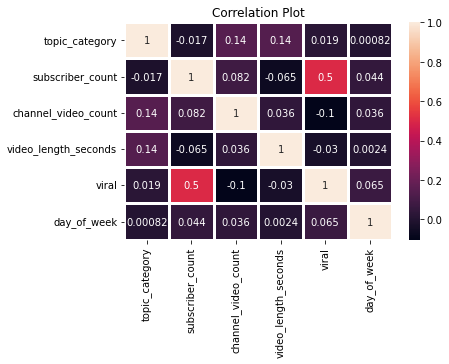

In [17]:
#correlation between features
corr_plot=sns.heatmap(df.corr(),annot=True, linewidths=3)
plt.title("Correlation Plot")
plt.show()

SCALE DATA

In [18]:
#seperate features and target
y=df['viral']
X=df.drop(columns='viral')

In [19]:
X.head()

,topic_category,subscriber_count,channel_video_count,video_length_seconds,day_of_week
0,7,146000000,811,179.0,3
1,7,146000000,811,1792.0,7
2,7,146000000,811,169.0,3
3,7,146000000,811,3681.0,7
4,7,146000000,811,159.0,3


In [20]:
stds=StandardScaler()
df_scaled=stds.fit_transform(X.to_numpy())
df_scaled=pd.DataFrame(df_scaled,columns=['topic_category','subscriber_count','channel_video_count','video_length_seconds','day_of_week'])

df_scaled.head()

,topic_category,subscriber_count,channel_video_count,video_length_seconds,day_of_week
0,0.215727,4.737927,-0.208141,-0.386398,-0.600557
1,0.215727,4.737927,-0.208141,0.432875,1.591367
2,0.215727,4.737927,-0.208141,-0.391477,-0.600557
3,0.215727,4.737927,-0.208141,1.392333,1.591367
4,0.215727,4.737927,-0.208141,-0.396556,-0.600557


RESAMPLE DATA

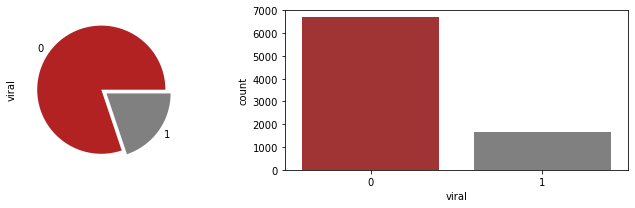

In [21]:
#chart target variables distribution- color #8C000F
fig=plt.figure(figsize=(10,3))
fig.add_subplot(1,2,1)
colors=['firebrick','gray']
explode=(0,.1)
a=df["viral"].value_counts(normalize=True).plot
a.pie(explode=explode,colors=colors)
fig.add_subplot(1,2,2)
chart=sns.countplot(x=df["viral"],palette=colors)

plt.tight_layout()
plt.show()

In [22]:
#percentage viral/not viral
print("Viral: ", df.viral.value_counts()[1]/len(df)*100,"%")
print("Not Viral: ", df.viral.value_counts()[0]/len(df)*100,"%")

Viral:  19.84687163536308 %
Not Viral:  80.15312836463691 %


In [23]:
#seperate features and target
y=df['viral']
X=df_scaled

In [24]:
#split data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(6269, 5)

In [25]:
y.value_counts()

0    6700
1    1659
Name: viral, dtype: int64

In [26]:
from imblearn.combine import SMOTEENN
from collections import Counter

smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)
Counter(y_resampled)

Counter({0: 5822, 1: 5723})

LOGISTIC REGRESSION

In [27]:
#create logistic regression model
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=150,
                                random_state=1)

#fit train the model
classifier.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=150, random_state=1)

In [28]:
#make predictions
y_pred = classifier.predict(X_test)
#accuracy score
print(accuracy_score(y_test, y_pred))

0.8755980861244019


In [29]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1533,  142],
       [ 118,  297]])

In [30]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1675
           1       0.68      0.72      0.70       415

    accuracy                           0.88      2090
   macro avg       0.80      0.82      0.81      2090
weighted avg       0.88      0.88      0.88      2090



RANDOM FOREST CLASSIFIER

In [31]:
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced

In [32]:
# Create a random forest classifier
from imblearn.ensemble import BalancedRandomForestClassifier

model = BalancedRandomForestClassifier(n_estimators=100, random_state=1)

# Fitting the model
model.fit(X_resampled, y_resampled)

BalancedRandomForestClassifier(random_state=1)

In [33]:
# Calculated the balanced accuracy score
y_pred=model.predict(X_test)
balanced_accuracy_score(y_test,y_pred)

0.939144038841935

In [36]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[1568,  107],
       [  24,  391]])

In [34]:
# Print the imbalanced classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1675
           1       0.79      0.94      0.86       415

    accuracy                           0.94      2090
   macro avg       0.89      0.94      0.91      2090
weighted avg       0.95      0.94      0.94      2090



In [35]:
# List the features sorted in descending order by feature importance
sorted(zip(model.feature_importances_, X.columns), reverse=True)

[(0.5507690094707619, 'subscriber_count'),
 (0.24975458878624882, 'channel_video_count'),
 (0.09097064063649654, 'topic_category'),
 (0.08988660350163531, 'video_length_seconds'),
 (0.01861915760485736, 'day_of_week')]

In [41]:
feature_imp=pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_imp

subscriber_count        0.550769
channel_video_count     0.249755
topic_category          0.090971
video_length_seconds    0.089887
day_of_week             0.018619
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


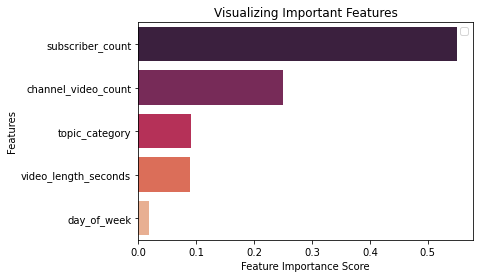

In [44]:
#visualize feature importance
#colors=sns.color_palette("rocket", as_cmap=True)
sns.barplot(x=feature_imp, y=feature_imp.index,palette="rocket")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Trying to increase accuracy score

In [46]:
model = BalancedRandomForestClassifier(max_leaf_nodes=24,n_estimators=120, random_state=1)

# Fitting the model
model.fit(X_resampled, y_resampled)

# Calculated the balanced accuracy score
y_pred=model.predict(X_test)
print("ACCURACY SCORE: ",balanced_accuracy_score(y_test,y_pred))

# Print the imbalanced classification report
print(classification_report(y_test,y_pred))

ACCURACY SCORE:  0.9106131990649164
              precision    recall  f1-score   support

           0       0.97      0.92      0.95      1675
           1       0.73      0.90      0.81       415

    accuracy                           0.91      2090
   macro avg       0.85      0.91      0.88      2090
weighted avg       0.93      0.91      0.92      2090



In [47]:
model = BalancedRandomForestClassifier(max_leaf_nodes=60,n_estimators=120, random_state=1)

# Fitting the model
model.fit(X_resampled, y_resampled)

# Calculated the balanced accuracy score
y_pred=model.predict(X_test)
print("ACCURACY SCORE: ",balanced_accuracy_score(y_test,y_pred))

# Print the imbalanced classification report
print(classification_report(y_test,y_pred))

ACCURACY SCORE:  0.9283761913324942
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1675
           1       0.74      0.94      0.83       415

    accuracy                           0.92      2090
   macro avg       0.86      0.93      0.89      2090
weighted avg       0.94      0.92      0.93      2090



In [48]:
model = BalancedRandomForestClassifier(max_leaf_nodes=50,n_estimators=50, random_state=1)

# Fitting the model
model.fit(X_resampled, y_resampled)

# Calculated the balanced accuracy score
y_pred=model.predict(X_test)
print("ACCURACY SCORE: ",balanced_accuracy_score(y_test,y_pred))

# Print the imbalanced classification report
print(classification_report(y_test,y_pred))

ACCURACY SCORE:  0.9247833123538931
              precision    recall  f1-score   support

           0       0.98      0.91      0.95      1675
           1       0.73      0.93      0.82       415

    accuracy                           0.92      2090
   macro avg       0.86      0.92      0.88      2090
weighted avg       0.93      0.92      0.92      2090



In [49]:
model = BalancedRandomForestClassifier(max_leaf_nodes= 80,n_estimators=1200, random_state=1)

# Fitting the model
model.fit(X_resampled, y_resampled)

# Calculated the balanced accuracy score
y_pred=model.predict(X_test)
print("ACCURACY SCORE: ",balanced_accuracy_score(y_test,y_pred))

# Print the imbalanced classification report
print(classification_report(y_test,y_pred))

ACCURACY SCORE:  0.9301672361086135
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1675
           1       0.75      0.94      0.83       415

    accuracy                           0.93      2090
   macro avg       0.87      0.93      0.89      2090
weighted avg       0.94      0.93      0.93      2090



In [50]:
model = BalancedRandomForestClassifier(max_leaf_nodes= 10,n_estimators=1200, random_state=1)

# Fitting the model
model.fit(X_resampled, y_resampled)

# Calculated the balanced accuracy score
y_pred=model.predict(X_test)
print("ACCURACY SCORE: ",balanced_accuracy_score(y_test,y_pred))

# Print the imbalanced classification report
print(classification_report(y_test,y_pred))

ACCURACY SCORE:  0.8998453515554756
              precision    recall  f1-score   support

           0       0.97      0.90      0.94      1675
           1       0.69      0.90      0.78       415

    accuracy                           0.90      2090
   macro avg       0.83      0.90      0.86      2090
weighted avg       0.92      0.90      0.91      2090



In [51]:
model = BalancedRandomForestClassifier(max_leaf_nodes= 800,n_estimators=1200, random_state=1)

# Fitting the model
model.fit(X_resampled, y_resampled)

# Calculated the balanced accuracy score
y_pred=model.predict(X_test)
print("ACCURACY SCORE: ",balanced_accuracy_score(y_test,y_pred))

# Print the imbalanced classification report
print(classification_report(y_test,y_pred))

ACCURACY SCORE:  0.9388455313792483
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1675
           1       0.78      0.94      0.86       415

    accuracy                           0.94      2090
   macro avg       0.88      0.94      0.91      2090
weighted avg       0.94      0.94      0.94      2090



ADABOOST CLASSIFIER

In [37]:
# Train the EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier

model_eec=EasyEnsembleClassifier(n_estimators=100, random_state=1)
model_eec.fit(X_resampled, y_resampled)

EasyEnsembleClassifier(n_estimators=100, random_state=1)

In [38]:
# Calculated the balanced accuracy score
y_pred=model_eec.predict(X_test)

balanced_accuracy_score(y_test, y_pred)

0.9094299586405323

In [39]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[1529,  146],
       [  39,  376]])

In [40]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.91      0.91      0.94      0.91      0.83      1675
          1       0.72      0.91      0.91      0.80      0.91      0.83       415

avg / total       0.92      0.91      0.91      0.92      0.91      0.83      2090

